In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/nanthasnk/Black-Friday-Sales-Prediction/master/Data/BlackFridaySales.csv")


In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

<ipython-input-9-d5f2b9387789>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Purchase"],color='b')


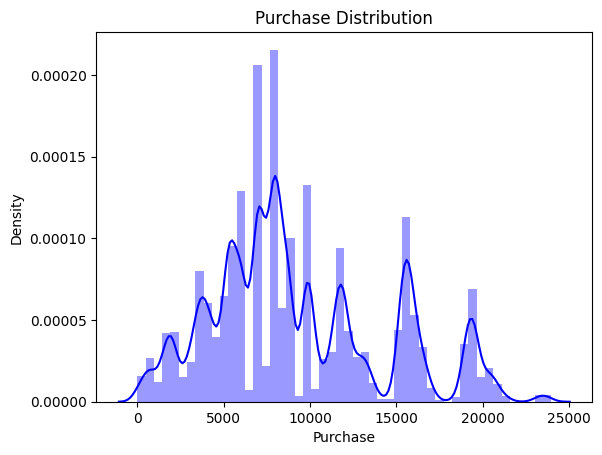

In [9]:
sns.distplot(df["Purchase"],color='b')
plt.title("Purchase Distribution")
plt.show()


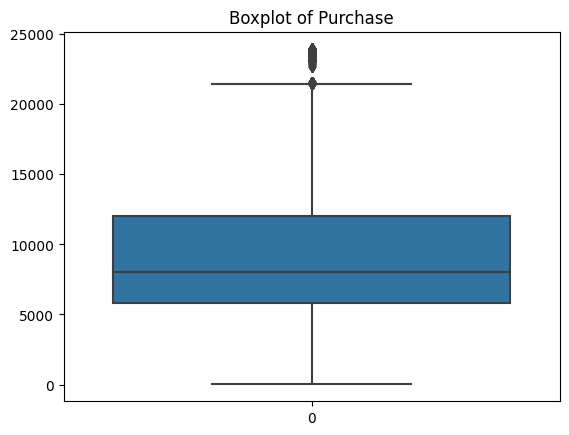

In [10]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [11]:
df['Purchase'].skew()

0.6001400037087128

In [12]:
#The purchase column is right skewed

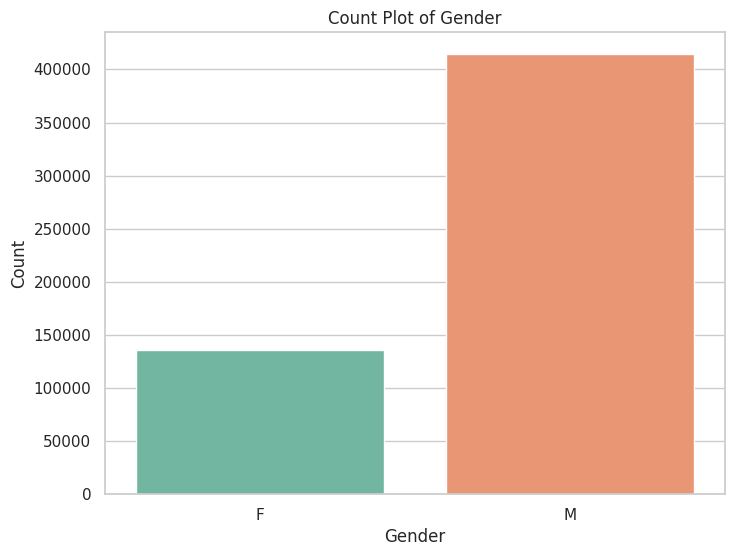

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df, palette="Set2")

plt.title("Count Plot of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()

This calculation shows there are more male purchases than female ones

In [14]:
df['Gender'].value_counts(normalize = True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

On average a male spends more than the female

In [15]:
df.groupby("Gender").mean()["Purchase"]

<ipython-input-15-71850d1af1a8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Gender").mean()["Purchase"]


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

City Purchases

In [16]:
#The below countplot shows that CIty B has the highest number of purchases

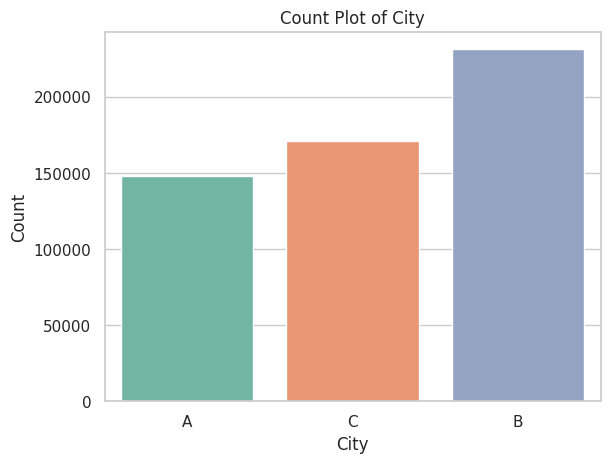

In [17]:
sns.countplot(x = 'City_Category',data =df,palette="Set2")
plt.xlabel("City")
plt.ylabel("Count")
plt.title("Count Plot of City")
plt.show()

However City C has the buyers who spend the most

<ipython-input-18-33e6005752a2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


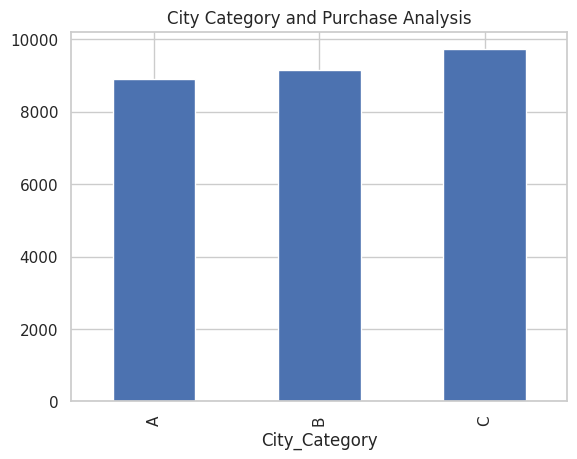

In [18]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()


Age group of 26-35 makes the most number of purchases

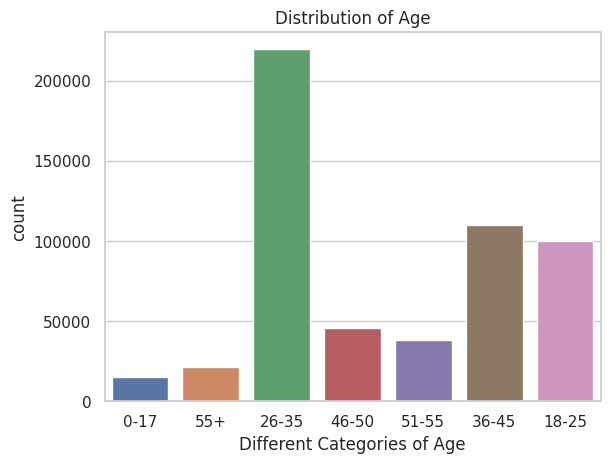

In [19]:
sns.countplot(x = 'Age',data =df)
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

<ipython-input-20-b3e91a5b5585>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Age").mean()["Purchase"].plot(kind='bar')


<Axes: xlabel='Age'>

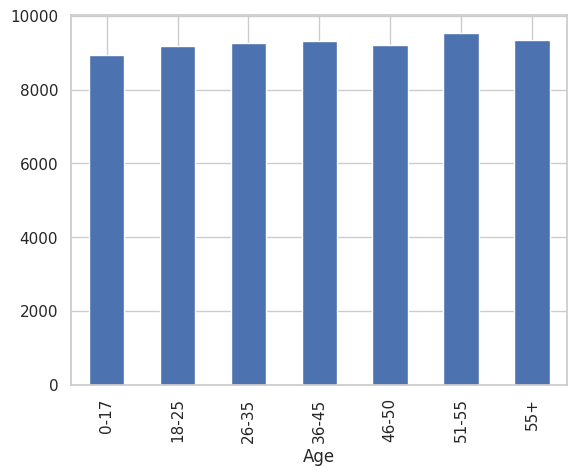

In [20]:
#This countplot shows that mean puchase rate between the age groups tends
#to be the same except that the 51-55 age group has a little higher average purchase amount.
df.groupby("Age").mean()["Purchase"].plot(kind='bar')



Product_Category_1

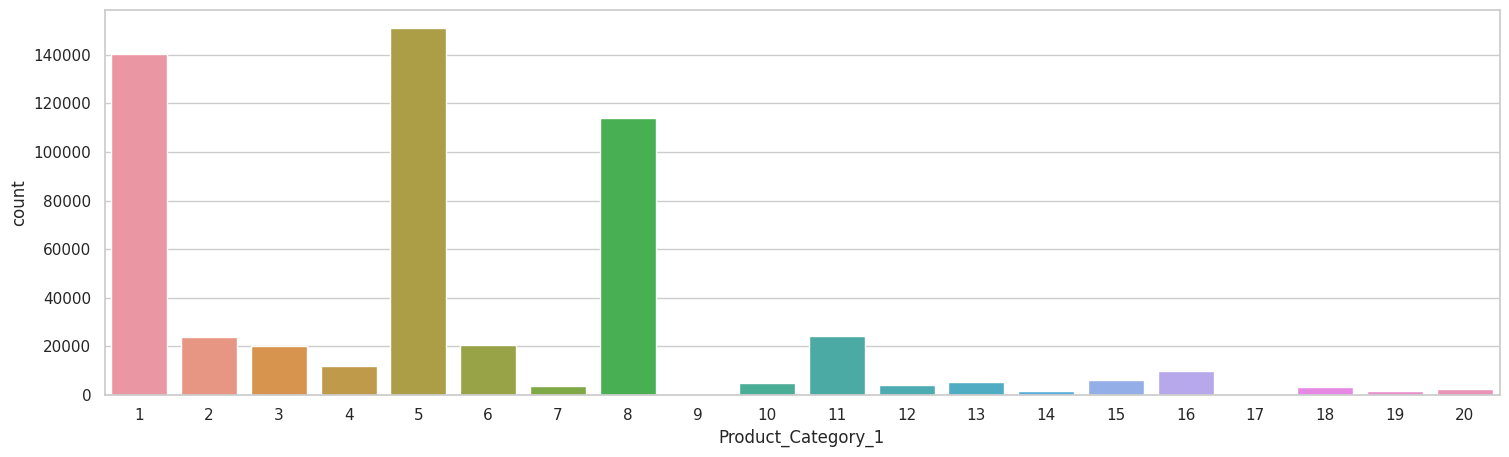

In [21]:
#The plot shows that product 1,5,8 clearly stand out.
plt.figure(figsize=(18,5))
sns.countplot(x= 'Product_Category_1',data = df)
plt.show()

In [22]:
df.corr

<bound method DataFrame.corr of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

<ipython-input-23-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


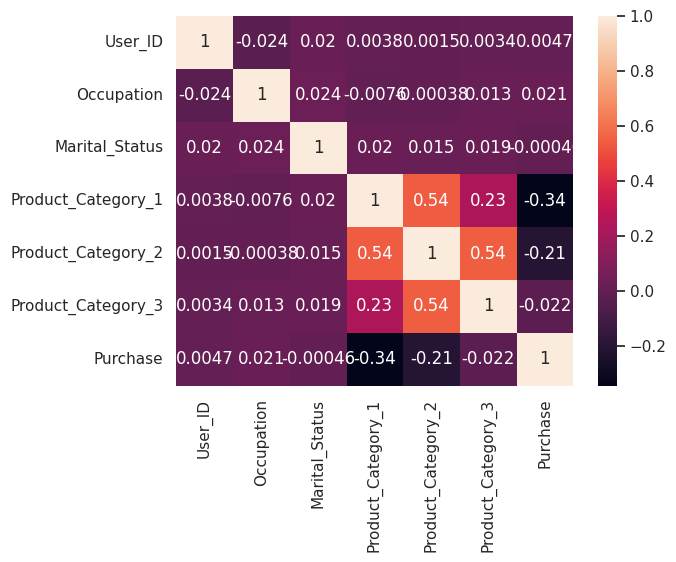

In [23]:

sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
df.columns
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [25]:
df.drop('Product_ID',axis=1)
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
